# Importing Pandas

In [3]:
# import pandas under the name pd
import pandas as pd

In [4]:
# print the pandas version that we are running
pd.__version__

'0.20.1'

## The Holy Trinity of data science libraries
These includes prepare this notebook so that we can work with our libraries and plot graphs inline.

In [8]:
%matplotlib inline 
import matplotlib.pylab
import pandas as pd
import numpy as np

## Dataframes 101

Think of a dataframe as a table where each row and each column is in fact a dictionary. You can create a data frame with a dictionary of lists for example:

In [44]:
students = pd.DataFrame({'phone': ['555-1212', '555-1234', '555-1111', '555-2222'], 'age':[17, 17, 18, 18]}, index = ['Melanie', 'Bob', 'Vidhya', 'Ming'])
students

         age     phone
Melanie   17  555-1212
Bob       17  555-1234
Vidhya    18  555-1111
Ming      18  555-2222

In [45]:
students.index

Index(['Melanie', 'Bob', 'Vidhya', 'Ming'], dtype='object')

In [46]:
students['age']

Melanie    17
Bob        17
Vidhya     18
Ming       18
Name: age, dtype: int64

You can also create a data frame with a numpy array and some column names.

In [47]:
df = pd.DataFrame(np.random.randn(6,4), index=['Jenny', 'Frank', 'Wenfei', 'Arun', 'Mary', 'Ivan'], columns=list('ABCD'))
df

               A         B         C         D
Jenny  -0.398493  0.748611 -1.128444  1.318690
Frank  -0.525643 -0.537438  0.150527  0.639365
Wenfei -1.113023 -0.345080 -0.351514  0.314616
Arun    0.652398  1.151885  0.042740  1.016047
Mary   -0.263237 -1.257489 -0.293587 -1.454344
Ivan   -0.784099 -0.588978 -0.241859  0.569757

In the case above what we have is a call to the `numpy` library that will create a 6x4 table of random numbers, and `pandas` will associate the list of indexes to the table's rows. We can get all the numbers for the row labelled 'Ivan', by using the index in our dataframe.

#### Accesing data elements in a data frame
- You can use the `.loc` property and access a locus by the name of the index.
- Or you can use `.iloc` to use the cardinal of the locus, that is the number of the position.

For example these you can get the same row by using these two different access methods.

In [48]:
df.loc['Ivan']

A   -0.784099
B   -0.588978
C   -0.241859
D    0.569757
Name: Ivan, dtype: float64

In [49]:
df.iloc[5]

A   -0.784099
B   -0.588978
C   -0.241859
D    0.569757
Name: Ivan, dtype: float64

# DataFrame basic operation
### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

In [9]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [11]:
# Create a DataFrame df from this dictionary data which has the index labels.
df = pd.DataFrame(data, index=labels)

In [12]:
# Display a summary of the basic information about this DataFrame and its data.
df.info()

# ...or...

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
age         8 non-null float64
animal      10 non-null object
priority    10 non-null object
visits      10 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000

# Dataframes (cont.)

In [15]:
# Return the first 3 rows of the DataFrame df.
df.iloc[:3]

# or equivalently

df.head(3)

age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
c  0.5  snake       no       2

In [16]:
# Select just the 'animal' and 'age' columns from the DataFrame df.
df.loc[:, ['animal', 'age']]

# or

df[['animal', 'age']]

animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0

In [17]:
# Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0

In [20]:
# Select only the rows where the number of visits is greater than 3.
df[df['visits'] > 3]

Empty DataFrame
Columns: [age, animal, priority, visits]
Index: []

In [21]:
# select the rows where the age is missing
df[df['age'].isnull()]

age animal priority  visits
d  NaN    dog      yes       3
h  NaN    cat      yes       1

In [22]:
# Select the rows where the animal is a cat and the age is less than 3
df[(df['animal'] == 'cat') & (df['age'] < 3)]

age animal priority  visits
a  2.5    cat      yes       1
f  2.0    cat       no       3

In [23]:
# Select the rows the age is between 2 and 4 (inclusive).
df[df['age'].between(2, 4)]

age animal priority  visits
a  2.5    cat      yes       1
b  3.0    cat      yes       3
f  2.0    cat       no       3
j  3.0    dog       no       1

In [37]:
# Change the age in row 'f' to 1.5.
df.loc['f', 'age'] = 1.5

In [26]:
# Calculate the sum of all visits (the total number of visits).
df['visits'].sum()

19

In [27]:
# Calculate the mean age for each different animal in df.
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [29]:
# append a new row 'k' to df with your choice of values for each column. 

df.loc['k'] = [5.5, 'dog', 'no', 2]

# ...then delete that row to return the original DataFrame.

df = df.drop('k')

In [30]:
# Count the number of each type of animal in df
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

# Dataframes: sorting

In [33]:
# Sort df first by the values in the 'age' in decending order, then by the value in the 'visit' column in ascending order.
df.sort_values(by=['age', 'visits'], ascending=[False, True])

age animal priority  visits
i  7.0    dog       no       2
e  5.0    dog       no       2
g  4.5  snake       no       1
j  3.0    dog       no       1
b  3.0    cat      yes       3
a  2.5    cat      yes       1
f  1.5    cat       no       3
c  0.5  snake       no       2
h  NaN    cat      yes       1
d  NaN    dog      yes       3

In [34]:
# The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be True and 'no' should be False.
df['priority'] = df['priority'].map({'yes': True, 'no': False})

In [35]:
# In the 'animal' column, change the 'snake' entries to 'python'.
df['animal'] = df['animal'].replace('snake', 'python')

For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [36]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

visits    1    2     3
animal                
cat     2.5  NaN  2.25
dog     3.0  6.0   NaN
python  4.5  0.5   NaN

# Series

#### A Series is basically a 1-dimensional dataframe

They have the same functionalities as a dataframe, but it doesn't make so much sense to speak of rows or columns. A series can be used to store the value of one variable over time, for example temperature samples every hour for a year, the value of a financial ticker every minute for a month, etc.

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

You can add labels to a series too.

In [51]:
s.index = ['a', 'b', 'c', 'd', 'e', 'f']
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [52]:
s.loc['b']

3.0

## Plotting a timeseries

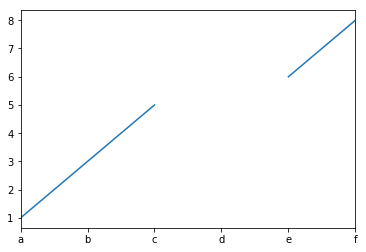

In [53]:
s.plot()

## Plotting a timeseries (cont.)

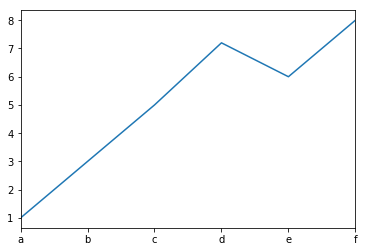

In [54]:
s.loc['d'] = 7.2
s.plot()

## Plotting a timeseries (cont.)

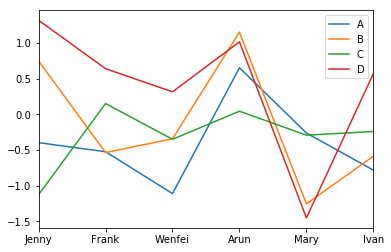

In [55]:
df.plot()

## Filtering

You can apply filters to your data by entering expressions in the selection, for example this expression returns all the samples in our series with an index greater than `c`.

In [56]:
s[s.index > 'c']

d    7.2
e    6.0
f    8.0
dtype: float64

## Understanding our data

In [57]:
students.age.mean()

17.5

In [58]:
students.age.max()  # maximum value in the age samples

18

In [59]:
students.age.min()  # minimum value in the age samples

17

### Adding information to an existing dataframe

In [60]:
students['grade'] = [100, 97, 80, 85]

Get the entry belonging to the student with the highest grade

In [61]:
students[students['grade'] == students['grade'].max()]

         age     phone  grade
Melanie   17  555-1212    100

### You can aggregate information and use the previous features too

In [62]:
students.groupby('age').grade.mean()

age
17    98.5
18    82.5
Name: grade, dtype: float64

### You can apply functions for on-the-fly data processing

In [63]:
# First let's see what a lambda function looks like / does
f = lambda x: x + 1

In [64]:
f(20)

21

In [65]:
students.age.apply(lambda age: age + 1)

Melanie    18
Bob        18
Vidhya     19
Ming       19
Name: age, dtype: int64

## Working with timestamped data

In [66]:
p = pd.Period('2016-06') # seventh month of 2016
p.start_time

Timestamp('2016-06-01 00:00:00')

In [67]:
p.end_time

Timestamp('2016-06-30 23:59:59.999999999')

## Taking it up a notch

## Study case: computational analysis of ECG

In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

def bitalino_printmeta(f):
    for k in f.attrs.keys():
        print(k, f.attrs[k])


ecgf = h5py.File('../datasets/ecg/day0_ecg_20150212_19h11m37s.h5', 'r')
bitalino_printmeta( ecgf )
ecg_samples = ecgf.attrs['nsamples']

device b'bioPLUX'
date 2015-2-12
time 19:6:7
channels [b'3']
fs [b'1000']
nbits [b'10']
macaddress b'98:D3:31:B2:C0:D6'
firmware version b''
hardware version 111
comments b''
video_src b''
video_sync -1
video_fps -1
nsamples 313896
lock_Dig_Port 1
duration b'5m13s'


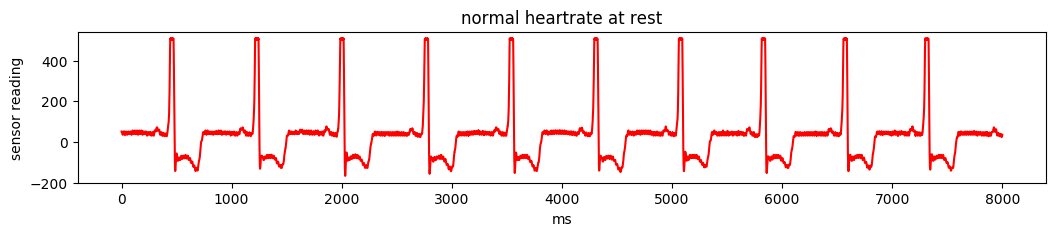

In [69]:
# covert data from ECG data file to a numpy array
ecg = np.asarray(ecgf['/raw/channel_3'], 'int32')

ts = (ecg[:,0]-512) # offset our samples
ts = ts[0:8000] # slice first 5k ms

# build timeseries from array slice
ecgts = pd.Series(data=ts)
plt.figure(1, figsize=(12.5,2), dpi=100)
plt.title('normal heartrate at rest')
plt.ylabel('sensor reading')
plt.xlabel('ms')

plt.plot(ecgts, 'r-')
plt.show()

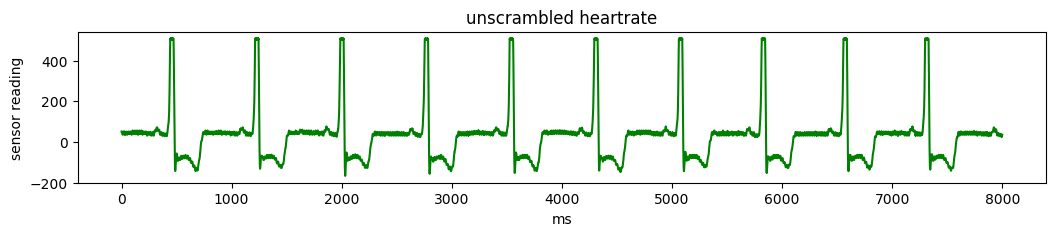

In [70]:
import matplotlib.collections as collections

tsdecoded = ecgts

plt.figure(4, figsize=(12.5,2), dpi=100)
plt.title('unscrambled heartrate')
plt.ylabel('sensor reading')
plt.xlabel('ms')

encsignal = pd.Series( tsdecoded )
plt.plot(encsignal, 'g-')  # 'g-' stands for "green lines"
plt.show()

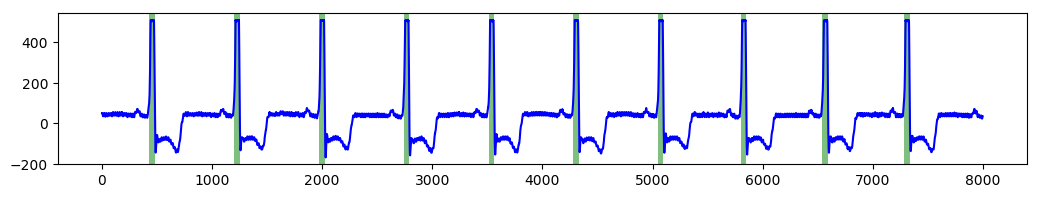

In [71]:
fig, ax = plt.subplots(figsize=(12.5,2), dpi=100)

ax.plot(encsignal, 'b-')
collection = collections.BrokenBarHCollection.span_where(
    encsignal.index, 
    ymin=-200, ymax=600, 
    where=encsignal>100, 
    facecolor='green', 
    alpha=0.5)
ax.add_collection(collection)

#collection = collections.BrokenBarHCollection.span_where(
#       t, ymin=-1, ymax=0, where=encsignal<0, facecolor='red', alpha=0.5)
#ax.add_collection(collection)

plt.show()